In [15]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.3 MB/s eta 0:00:00a 0:00:01


In [29]:
!pip install nltk!

# Importing Libraries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Data

In [52]:
imdb_rev = pd.read_csv(r'IMDB Dataset.csv')

In [53]:
imdb_rev

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Exploring data

In [54]:
imdb_rev.shape

(50000, 2)

In [55]:
imdb_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


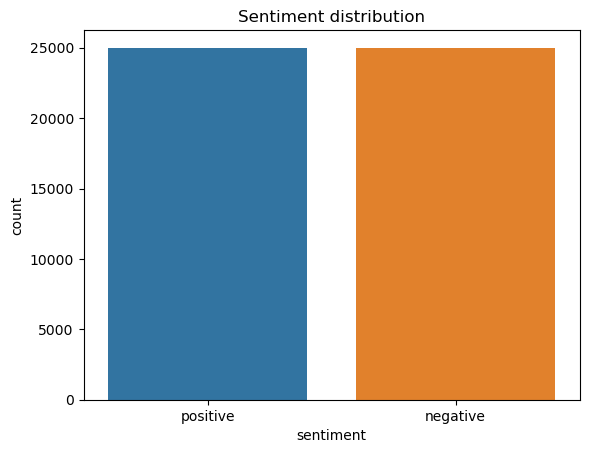

In [56]:
sns.countplot(x='sentiment', data=imdb_rev)
plt.title("Sentiment distribution")
plt.show()

In [57]:
# print first 5 reviews

for i in range(5):
  print("Review number ",[i],"\n")
  print(imdb_rev['review'].iloc[i], "\n")
  print("Sentiment: ", imdb_rev['sentiment'].iloc[i], "\n\n")

Review number  [0] 

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the s

# Preprocessing data

In [58]:
# function to count number of words
def count_words(text):
  words = text.split()
  num_words = len(words)
  return num_words

In [59]:
# creating a new column to show word count
imdb_rev['word count'] = imdb_rev['review'].apply(count_words)
imdb_rev.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [60]:
# converting upper case to lower case
imdb_rev['review'] = imdb_rev['review'].str.lower()
imdb_rev.head()

,review,sentiment,word count
0,one of the other reviewers has mentioned that ...,positive,307
1,a wonderful little production. <br /><br />the...,positive,162
2,i thought this was a wonderful way to spend ti...,positive,166
3,basically there's a family where a little boy ...,negative,138
4,"petter mattei's ""love in the time of money"" is...",positive,230


In [61]:
# encoding sentiment column
imdb_rev.sentiment.replace("positive", 1, inplace=True)
imdb_rev.sentiment.replace("negative", 0, inplace=True)

In [62]:
imdb_rev.head()

,review,sentiment,word count
0,one of the other reviewers has mentioned that ...,1,307
1,a wonderful little production. <br /><br />the...,1,162
2,i thought this was a wonderful way to spend ti...,1,166
3,basically there's a family where a little boy ...,0,138
4,"petter mattei's ""love in the time of money"" is...",1,230


In [63]:
# function to clean reviews
def preprocess(text):
  soup = BeautifulSoup(text, "html.parser") #Removing the html strips
  text = soup.get_text()
  text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
  text = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", text, flags = re.MULTILINE)  #Removing emails 
  text = re.sub('\[[^]]*\]', '', text)  #Removing the square brackets
  text = re.sub(r'[^a-zA-z0-9\s]', '', text)  #Removing special character and keep only words and numbers
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]  #Removing stop words
  new_text = " ".join(filtered_text)
  ps = nltk.porter.PorterStemmer()  #Stemming the text
  new_text = ' '.join([ps.stem(word) for word in new_text.split()])
  return new_text

In [64]:
# checking duplicates before preprocessing
duplicated_count = imdb_rev.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  418


In [65]:
# applying it on reviews
imdb_rev.review = imdb_rev['review'].apply(preprocess)

/Users/tejavinnakota/anaconda3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [66]:
# checking after preprocessing
duplicated_count = imdb_rev.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  420


In [67]:
#dropping duplicates 
imdb_rev = imdb_rev.drop_duplicates('review')

In [68]:
# creating a new column to show word count after preprocesing
imdb_rev['new word count'] = imdb_rev['review'].apply(count_words)
imdb_rev.head()

/var/folders/78/sz6sk6x521v_vf42vp3r4_mh0000gn/T/ipykernel_46774/2957222664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_rev['new word count'] = imdb_rev['review'].apply(count_words)


,review,sentiment,word count,new word count
0,one review mention watch 1 oz episod youll hoo...,1,307,168
1,wonder littl product film techniqu unassum old...,1,162,84
2,thought wonder way spend time hot summer weeke...,1,166,86
3,basic there famili littl boy jake think there ...,0,138,67
4,petter mattei love time money visual stun film...,1,230,125


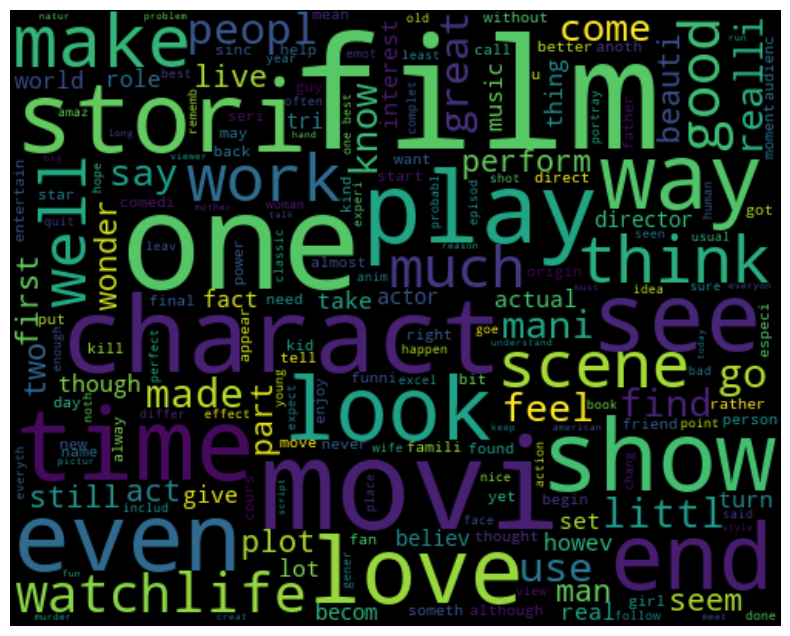

In [70]:
# wordcloud for positive reviews
all_words = " ".join([sentence for sentence in imdb_rev['review'][imdb_rev['sentiment']== 1]])

wordcloud = WordCloud(width=500, height=400, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

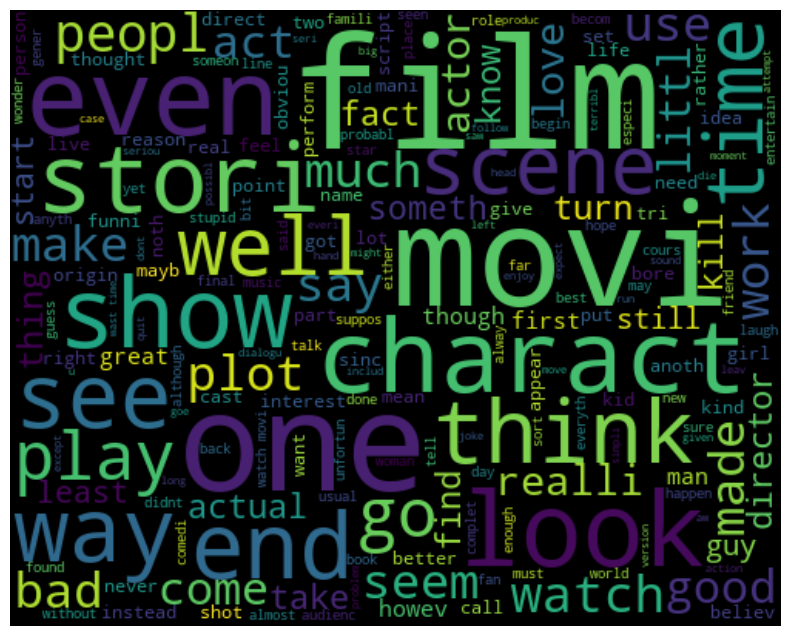

In [72]:
# wordcloud for negative reviews
all_words = " ".join([sentence for sentence in imdb_rev['review'][imdb_rev['sentiment']== 0]])

wordcloud = WordCloud(width=500, height=400, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Splitting data

In [107]:
X = imdb_rev['review']
Y = imdb_rev['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [108]:
# Term Frequency-Inverse Document Frequency model (TFIDF)
# It is used to convert text documents to matrix of tfidf features
vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)
print("TF-IDF vocabulary size:", x_train.shape[1])

TF-IDF vocabulary size: 142476


In [82]:
# printing the sizes of x_train, y_train, x_test and y_test
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 142476)
Size of y_train:  (34704,)
Size of x_test:  (14874, 142476)
Size of y_test:  (14874,)


# Modelling and Evaluation

In [84]:
# LogisticRegression
lr = LogisticRegression()

lr.fit(x_train, y_train)
print("train score : ", lr.score(x_train, y_train))
print("test score : ", lr.score(x_test, y_test))
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(lr_pred, y_test)
print("Test accuracy: {:.2f}%".format(lr_acc*100))

train score :  0.928711387736284
test score :  0.8887320155976872
Test accuracy: 88.87%


In [85]:
lr_report=classification_report(y_test,lr_pred,target_names=['Positive','Negative'])
print(lr_report)

              precision    recall  f1-score   support

    Positive       0.90      0.87      0.89      7395
    Negative       0.88      0.90      0.89      7479

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [86]:
def cm (y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                  index=['Predict Positive:1', 'Predict Negative:0'])
  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Text(0.5, 1.0, 'Confusion matrix of Logistic Regression')

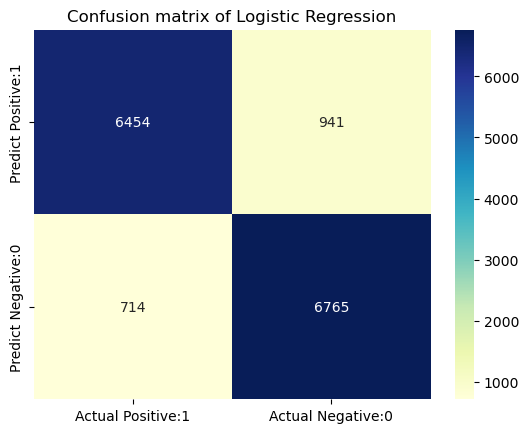

In [87]:
cm(y_test,lr_pred)
plt.title('Confusion matrix of Logistic Regression')

In [88]:
# MultinomialNB
mn = MultinomialNB()
mn.fit(x_train, y_train)
print("train score : ", mn.score(x_train, y_train))
print("test score : ", mn.score(x_test, y_test))
mn_pred = mn.predict(x_test)
mn_acc = accuracy_score(mn_pred, y_test)
print("Test accuracy: {:.2f}%".format(mn_acc*100))

train score :  0.9131224066390041
test score :  0.8622428398547801
Test accuracy: 86.22%


In [89]:
mn_report=classification_report(y_test,mn_pred,target_names=['Positive','Negative'])
print(mn_report)

              precision    recall  f1-score   support

    Positive       0.86      0.86      0.86      7395
    Negative       0.87      0.86      0.86      7479

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



Text(0.5, 1.0, 'Confusion matrix of MultinomialNB')

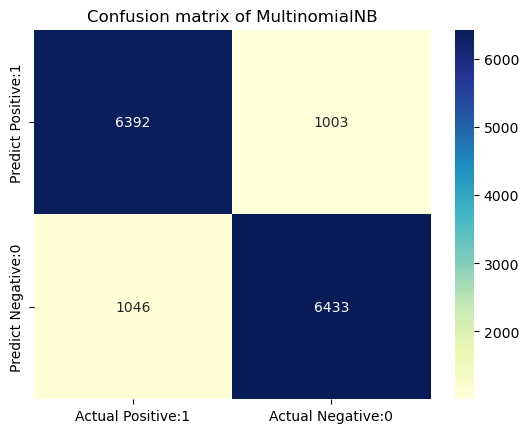

In [90]:
cm(y_test,mn_pred)
plt.title('Confusion matrix of MultinomialNB')

In [91]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("train score : ", dt.score(x_train, y_train))
print("test score : ", dt.score(x_test, y_test))
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
print("Test accuracy: {:.2f}%".format(dt_acc*100))

train score :  1.0
test score :  0.7128546456904666
Test accuracy: 71.29%


In [93]:
comp = {'Algorithm': ['Logistic Regression', 'MultinomialNB','DecisionTreeClassifier'], 'Test Accuracy': [lr_acc, mn_acc,dt_acc]}
pd.DataFrame(data=comp)

,Algorithm,Test Accuracy
0,Logistic Regression,0.888732
1,MultinomialNB,0.862243
2,DecisionTreeClassifier,0.712855
